In [ ]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/Dataset/Training.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:

file_name = '/content/drive/MyDrive/Dataset/Test.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import joblib

In [ ]:
labels = ['Fire', 'No_Fire']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        temp = 0
        for img in os.listdir(path):
            temp = temp + 1
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
                if temp == 300:
                  break
            except Exception as e:
                print(e)
    #data = data[:10000]
    return np.array(data)

In [ ]:
#Now we can easily fetch our train and validation data.
#train = get_data('/content/Training')
val = get_data('/content/Test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
cd /content/drive/MyDrive/Dataset/Fire Classification

/content/drive/MyDrive/Dataset/Fire Classification


In [ ]:

# Save the model as a pickle in a file 
joblib.dump(train, 'Train.pkl') 
joblib.dump(val, 'Val.pkl') 

# Load the model from the file 
#knn_from_joblib = joblib.load('filename.pkl') 

['Val.pkl']

In [ ]:
train = joblib.load('/content/drive/MyDrive/Dataset/Fire Classification/Train.pkl') 
val = joblib.load('/content/drive/MyDrive/Dataset/Fire Classification/Val.pkl') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


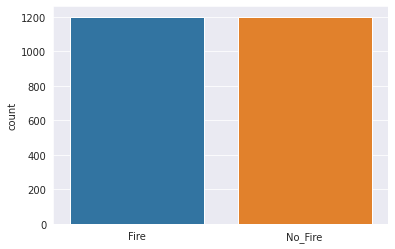

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Fire")
    else:
        l.append("No_Fire")
sns.set_style('darkgrid')
sns.countplot(l)


Text(0.5, 1.0, 'Fire')

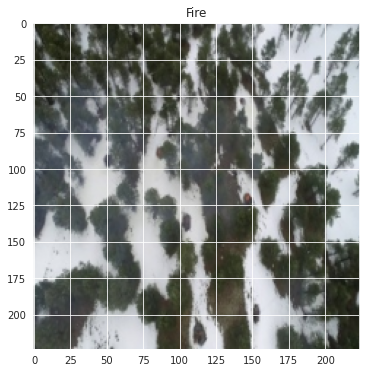

In [ ]:
plt.figure(figsize = (6,6))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'No_Fire')

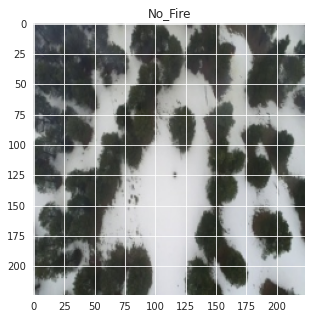

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []
img_size = 224
for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images####################


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.8))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)       

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 105 , validation_data = (x_val, y_val))

Epoch 1/105
75/75 [==============================] - 4s 41ms/step - loss: 0.6793 - accuracy: 0.5053 - val_loss: 0.7057 - val_accuracy: 0.5000
Epoch 2/105
75/75 [==============================] - 2s 28ms/step - loss: 0.6574 - accuracy: 0.5252 - val_loss: 0.7154 - val_accuracy: 0.5000
Epoch 3/105
75/75 [==============================] - 2s 29ms/step - loss: 0.6485 - accuracy: 0.5520 - val_loss: 0.7243 - val_accuracy: 0.5000
Epoch 4/105
75/75 [==============================] - 2s 28ms/step - loss: 0.6206 - accuracy: 0.6034 - val_loss: 0.7316 - val_accuracy: 0.5000
Epoch 5/105
75/75 [==============================] - 2s 28ms/step - loss: 0.6053 - accuracy: 0.6741 - val_loss: 0.7372 - val_accuracy: 0.5000
Epoch 6/105
75/75 [==============================] - 2s 28ms/step - loss: 0.5873 - accuracy: 0.7210 - val_loss: 0.7462 - val_accuracy: 0.5000
Epoch 7/105
75/75 [==============================] - 2s 28ms/step - loss: 0.5695 - accuracy: 0.7320 - val_loss: 0.7602 - val_accuracy: 0.5000
Epoch 

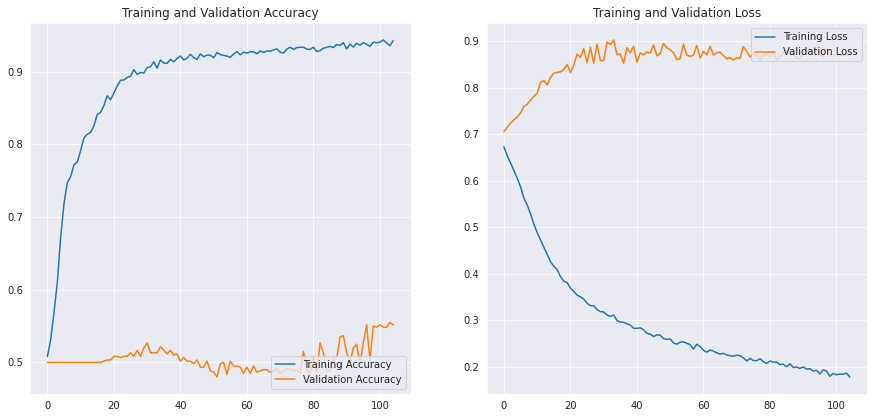

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(105)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Fire (Class 0)','Non_Fire (Class 1)']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                    precision    recall  f1-score   support

    Fire (Class 0)       0.54      0.71      0.61       300
Non_Fire (Class 1)       0.57      0.40      0.47       300

          accuracy                           0.55       600
         macro avg       0.56      0.55      0.54       600
      weighted avg       0.56      0.55      0.54       600

